# 13. 任意酉矩阵门分解 (2)

在lecture 13中，我们已经学会将任意酉矩阵分解为若干二级酉矩阵的乘积，那么下一个目标就是将二级酉矩阵用我们所熟知的单比特门和双比特门来构造出来。

## 只有一位不同

二级矩阵具有这样的性质：除了两个下标 $s$ 和 $t$ 对应的子空间 $|s\rangle$ 和 $|t\rangle$，对于其他的空间不做变换（保持不变）。设有 $n$ 个量子比特，标准正交基为 $|0\rangle, \ldots, |2^n-1\rangle$，如果 $s$ 和 $t$ 的二进制中只有一位数字不同，例如：
$$
|s\rangle \equiv |111\ldots 10\rangle = |c\rangle|0\rangle \\
|t\rangle \equiv |111\ldots 11\rangle = |c\rangle|1\rangle
$$

不妨设二级矩阵 $U$ 为
$$
U = \begin{bmatrix}
1 & & & \\
& \ddots & & \\
& & a & c \\
& & b & d
\end{bmatrix}
$$

我们可以将其写成外积形式：

$$\begin{align*}
U = & I - |s\rangle\langle s| - |t\rangle\langle t| + \left( a |s\rangle + b|t\rangle \right) \langle s| + \left( c|s\rangle + d|t\rangle \right) \langle t| \\
= &  a |c\rangle\langle c|\otimes |0\rangle\langle 0| + b|c\rangle\langle c| \otimes |1\rangle\langle 0| \\
  & + c |c\rangle\langle c|\otimes |0\rangle\langle 1| + d|c\rangle\langle c|\otimes |1\rangle\langle 1| \\
  & + I\otimes I - |c\rangle\langle c| \otimes \left(|0\rangle\langle 0| + |1\rangle\langle 1|\right) \\
= &  I\otimes I - |c\rangle\langle c|\otimes I \\
  & + |c\rangle\langle c|\otimes \left( a|0\rangle\langle 0| + b|1\rangle\langle 0|  + c|0\rangle\langle 1| + d|1\rangle\langle 1|\right) \\
= &  \left(I - |c\rangle\langle c|\right)\otimes I + |c\rangle\langle c|\otimes \tilde{U} \\
= &  C(\tilde{U})
\end{align*}$$

其中 $\tilde{U} = \begin{bmatrix} a & c \\ b & d \end{bmatrix}$ 是一个单比特门。

这说明，如果 $s$ 和 $t$ 二进制仅有一位数字不同，那么这个二级矩阵 $U$ 可以使用 $C^{n-1}(\tilde{U})$ 来实现。

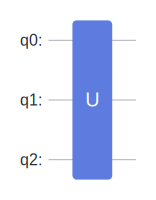

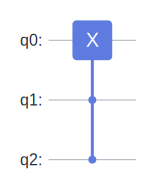

True


In [1]:
from mindquantum import C
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, UnivMathGate
import numpy as np
from IPython.display import display_svg

u = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]
])
circ1 = Circuit()
circ1 += UnivMathGate("U", u).on([0, 1, 2])
display_svg(circ1.svg())

circ2 = Circuit()
circ2 += X.on(0, [1, 2])
display_svg(circ2.svg())

print(np.allclose(circ1.matrix(), circ2.matrix()))

## 任意的二级矩阵

如果有多位不同，怎么办？下面介绍格雷码（Gray code）：格雷码是一种二进制编码，每个相邻码位之间**有且仅有**一位二进制数字不同。

利用格雷码，我们可以将任意 $s$ 和 $t$ 关联起来，事实上，因为 $d(s,t) \leq n$，所以我们可以生成长度不超过 $n+1$ 的格雷码序列：
$$
s = g_0, g_1, g_2, \ldots, g_{m-1}, g_m = t, \quad \text{where }m\leq n
$$


接下来，我们通过「交换」将 $s$ 移动到 $g_{m-1}$ ，这样 $s$ 和 $t$ 就相邻了，执行 $U$ 操作，然后再「交换」回来就完成了。

我们这样构造「交换」操作：
$$
\begin{align*}
G_k & = (I - |g_{k-1}\rangle\langle g_{k-1}| - |g_k\rangle\langle g_k|) + 
|g_k\rangle\langle g_{k-1}| + |g_{k-1}\rangle\langle g_k| \\
& = \begin{pmatrix}
g_0 & \cdots & g_{k-1} & g_{k} & \cdots & g_m \\
g_0 & \cdots & g_k & g_{k-1} & \cdots & g_m
\end{pmatrix} = \begin{pmatrix}
g_{k} & g_{k-1}
\end{pmatrix}
\end{align*}
$$

> 这里使用**循环群**的记号方便书写。
> 
> $\begin{pmatrix} a & b & c \\ b & c & a\end{pmatrix}$ 表示 $a\rightarrow b, b\rightarrow c, c\rightarrow a$ 的映射。可以简记为 $\begin{pmatrix}a & b & c\end{pmatrix}$ .

结合 $U$ 的定义

$$\begin{align*}
U = & (I - |s\rangle\langle s| - |t\rangle\langle t|) \\
    & + \left( a |s\rangle + b|t\rangle \right) \langle s| + \left( c|s\rangle + d|t\rangle \right) \langle t| \\
  = & \begin{pmatrix}
    s & t \\
    a s + b t & c s + d t 
\end{pmatrix}
\end{align*}$$

> 这里 $\begin{pmatrix} s & t \\ a s + b t & c s + d t \end{pmatrix}$ 表示 $|s\rangle \rightarrow a|s\rangle + b|t\rangle, |t\rangle \rightarrow c|s\rangle + d|t\rangle$ 的映射。

$$
\begin{align*}
& G_1 \cdots G_{m-1} \tilde{U} G_{m-1}\cdots G_1 \\
= & G_1\cdots G_{m-1} \tilde{U} G_{m-1}\cdots G_3 \begin{pmatrix}
g_2 & g_1
\end{pmatrix} \begin{pmatrix}
g_1 & g_0
\end{pmatrix} \\
= & G_1\cdots G_{m-1} \tilde{U} G_{m-1}\cdots G_3 \begin{pmatrix}
g_2 & g_1 & g_0
\end{pmatrix} \\
= & G_1\cdots G_{m-1} \tilde{U} \begin{pmatrix}
g_{m-1} & \cdots & g_1 & g_0
\end{pmatrix} \\
= & \begin{pmatrix}
g_0 & \cdots & g_{m-1}
\end{pmatrix} \tilde{U} \begin{pmatrix}
g_{m-1} & \cdots & g_0
\end{pmatrix} \\
= & \begin{pmatrix}
g_0 & \cdots & g_{m-1}
\end{pmatrix}
\begin{pmatrix}
g_{m-1} & g_m \\
a g_{m-1} + b g_m & c g_{m-1} + d g_m
\end{pmatrix}
\begin{pmatrix}
g_{m-1} & \cdots & g_0
\end{pmatrix} \\
= & \begin{pmatrix}
g_{0} & g_m \\
a g_{0} + b g_m & c g_{0} + d g_m
\end{pmatrix} = U
\end{align*}
$$

每个交换操作 $G_k$ 和 $\tilde{U}$ 都是二级酉矩阵，而且其作用的两个态之间有且仅有一位不同，所以可以使用我们上一节中的结论，使用单目标比特、多控制比特的门来实现。

对于单目标比特、多控制比特的门，我们可以使用辅助比特和Toffoli门来实现。如下所示，q0,q1,q2,q3,q4 为控制比特，q5,q6,q7,q8为辅助比特，初始值为 $|0\rangle$，q9是目标比特，作用 H 门，通过枚举所有可能的输入，对比输出发现两个线路是等价的。

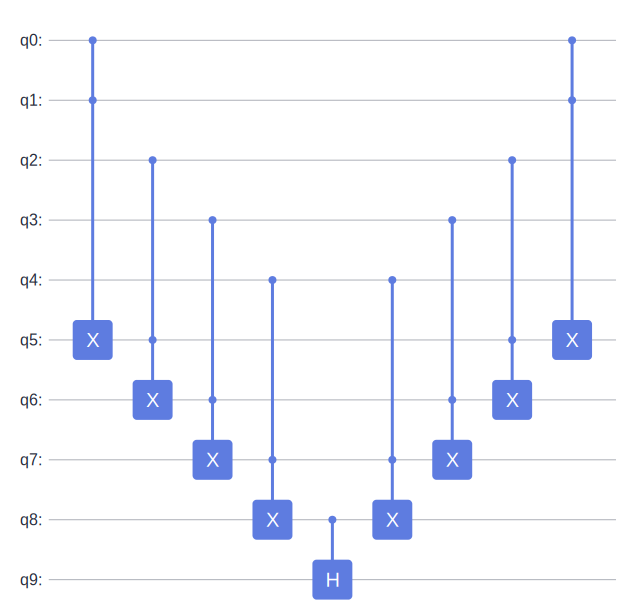

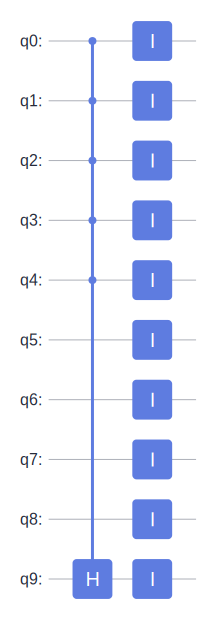

True

In [2]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, H, I
from IPython.display import display_svg
import numpy as np
from mindquantum.simulator import Simulator

circ1 = Circuit()
circ1 += X.on(5, [0, 1])
circ1 += X.on(6, [5, 2])
circ1 += X.on(7, [6, 3])
circ1 += X.on(8, [7, 4])
circ1 += H.on(9, 8)
circ1 += X.on(8, [7, 4])
circ1 += X.on(7, [6, 3])
circ1 += X.on(6, [5, 2])
circ1 += X.on(5, [0, 1])
display_svg(circ1.svg())

circ2 = Circuit()
circ2 += H.on(9, [0, 1, 2, 3, 4])
for q in range(10):
    circ2 += I.on(q)
display_svg(circ2.svg())

def check(c1, c2):
    sim = Simulator("mqvector", 10)

    def calc(s):
        sim.set_qs(s)
        sim.apply_circuit(c1)
        t1 = sim.get_qs()
        sim.set_qs(s)
        sim.apply_circuit(c2)
        t2 = sim.get_qs()
        return np.allclose(t1, t2)

    for mask in range(2 ** 5):
        s = np.array([1])
        for b in range(5):
            if mask & (1<<b) > 0:
                s = np.kron(np.array([1, 0]), s)
            else:
                s = np.kron(np.array([0, 1]), s)
        for b in range(5, 9):
            s = np.kron(np.array([1, 0]), s)
        s1 = np.kron(np.array([1, 0]), s)
        s2 = np.kron(np.array([0, 1]), s)
        if not calc(s1) or not calc(s2):
            return False
    return True

check(circ1, circ2)


而Toffoli门可以通过下面的线路实现：

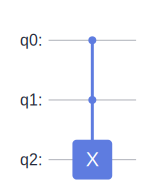

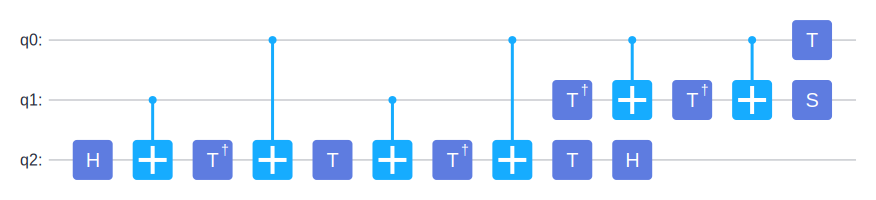

True


In [3]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import H, X, T, S
from IPython.display import display_svg
import numpy as np

c1 = Circuit()
c1 += X.on(2, [0, 1])
display_svg(c1.svg())

c2 = Circuit()
c2 += H.on(2)
c2 += X.on(2, 1)
c2 += T.hermitian().on(2)
c2 += X.on(2, 0)
c2 += T.on(2)
c2 += X.on(2, 1)
c2 += T.hermitian().on(2)
c2 += X.on(2, 0)
c2 += T.on(2)
c2 += T.hermitian().on(1)
c2 += H.on(2)
c2 += X.on(1, 0)
c2 += T.hermitian().on(1)
c2 += X.on(1, 0)
c2 += T.on(0)
c2 += S.on(1)
display_svg(c2.svg())

print(np.allclose(c1.matrix(), c2.matrix()))

综上所述，结合lecture 13的内容，我们已经实现了对于任意酉矩阵，将其用单量子门和双量子门来实现。

下面举一个例子：$U$ 是一个二级酉矩阵，如下所示：
$$
U = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

从中我们可以看出 $s = 001$，$t = 110$，$\tilde{U} = {1\over\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} = H$。

我们构造格雷码：
$$
\begin{align*}
g_0 & = 001 = s \\
g_1 & = 000 \\
g_2 & = 010 \\
g_3 & = 110 = t
\end{align*}
$$

线路如下：

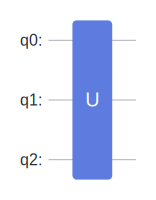

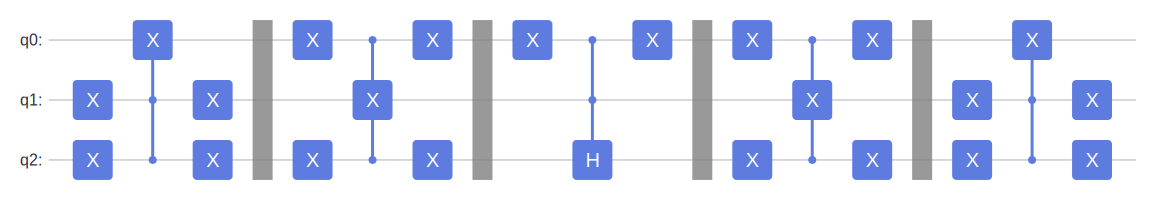

True


In [4]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, H, UnivMathGate, BarrierGate
from IPython.display import display_svg
import numpy as np

v = 1 / np.sqrt(2)
u = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, v, 0, 0, 0, 0, v, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, v, 0, 0, 0, 0, -v, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
])
c1 = Circuit()
c1 += UnivMathGate("U", u).on([0, 1, 2])
display_svg(c1.svg())

c2 = Circuit()
# G1
c2 += X.on(1)
c2 += X.on(2)
c2 += X.on(0, [1,2])
c2 += X.on(1)
c2 += X.on(2)
c2 += BarrierGate()
# G2
c2 += X.on(0)
c2 += X.on(2)
c2 += X.on(1, [0, 2])
c2 += X.on(0)
c2 += X.on(2)
c2 += BarrierGate()
# U
c2 += X.on(0)
c2 += H.on(2, [0, 1])
c2 += X.on(0)
c2 += BarrierGate()
# G2
c2 += X.on(0)
c2 += X.on(2)
c2 += X.on(1, [0, 2])
c2 += X.on(0)
c2 += X.on(2)
c2 += BarrierGate()
# G1
c2 += X.on(1)
c2 += X.on(2)
c2 += X.on(0, [1,2])
c2 += X.on(1)
c2 += X.on(2)

display_svg(c2.svg())

print(np.allclose(c1.matrix(), c2.matrix()))

In [5]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')

# 习题

## Exercise 1

给出下面这个二级酉矩阵的分解。

In [6]:
import numpy as np

v = 1 / np.sqrt(2)
u = np.array([
    [v, 0, 0, 0, 0, 0, 0, v],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [v, 0, 0, 0, 0, 0, 0, -v],
])